 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous 'whale' investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Global Variables

# Global String variables to cut down on thier use

# Global Date String variable
date = 'Date'
# Global Close String variable
close = 'Close'
# Global S&P 500 String variable
snp500 = 'S&P 500'
# Global Portfolios String variable
portfolios = 'Portfolios'
# Global Portfolios/Market String variable
portfolios_market = f'{portfolios}/Market'
# Global Daily String variable
daily = 'Daily'
# Global Returns String variable
returns = 'Returns'
# Global Daily Returns String variable
daily_returns = f'{daily} {returns}'
# Global Standard Deviation String variable
std = 'Standard Deviation'
# Global Sharpe Ratio String variable
sharpe_ratio = 'Sharpe Ratio'
# Global Annualized String variable
annualized = 'Annualized'
# Global Beta String variable
beta = 'Beta'
# Global Meta ticker symbol
meta = 'META'
# Global Meta ticker symbol
amd = 'AMD'
# Global Meta ticker symbol
ibm = 'IBM'
# Global Bold variable for plot styling
bold = 'bold'


# Global Integer variables for plots

# Global Plot Label Fontsize
label_fontsize = 18
# Global Plot Title Fontsize
title_fontsize = 24
# Global Plot X/Y Axis Font Size
plot_fontsize = 14
# Global Plot Figure Width Size 
figsize_width = 20

# Global Float variable representing a year of trading days square root
annualized_sqrt = 252**0.5

In [3]:
# Utility method that gets/transforms DataFrame
def get_transformed_df(file_name, is_returns = True):
    # Optionally appending '_returns' or empty String based on boolean flag
    returns_filepath = '_' + returns if is_returns else ''
    # Getting/Returning transformed DataFrame from CSV Path
    # Makes Date column a sorted DatetimeIndex
    return pd.read_csv(Path(f'./Resources/{file_name}{returns_filepath}.csv'),
                       index_col=date,
                       parse_dates=True,
                       infer_datetime_format=True).sort_index()

In [4]:
# Reading whale returns
whale_df = get_transformed_df('whale')
# Displaying Last 5 Rows
whale_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [5]:
# Utility method that prints both the sum of the nulls as well as how many nulls per column
def print_na(df):
    # Nulls Sum
    na_sum = df.isna().sum()
    # Printing Nulls Sums
    print(f'\nTotal Nulls: {na_sum.sum()}\n\n{na_sum}\n')

In [6]:
# Count nulls
print_na(whale_df)


Total Nulls: 4

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64



In [7]:
# Utility method that drops null values inplace and prints using above method
def drop_print_na(df):
    # Dropping Nulls Inplace
    df.dropna(inplace=True)
    # Printing Nulls Sum
    print_na(df)

In [8]:
# Drop nulls
drop_print_na(whale_df)


Total Nulls: 0

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64



## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
algo_df = get_transformed_df('algo')
# Displaying Last 5 Rows
algo_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [10]:
# Count nulls
print_na(algo_df)


Total Nulls: 6

Algo 1    0
Algo 2    6
dtype: int64



In [11]:
# Drop nulls
drop_print_na(algo_df)


Total Nulls: 0

Algo 1    0
Algo 2    0
dtype: int64



## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_df = get_transformed_df('sp500_history', False)
# Displaying Last 5 Rows
sp500_df.tail()

,Close
Date,
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03
2019-04-22,$2907.97
2019-04-23,$2933.68


In [13]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types

# Removing dollar sign from close column
sp500_df[close] = sp500_df[close].str.replace(f'$', f'', regex=True)
# Making close column a float
sp500_df[close] = sp500_df[close].astype('float')
# Dislpaying data types
sp500_df.dtypes

Close    float64
dtype: object

In [15]:
# Calculate Daily Returns
sp500_df[close] = sp500_df[close].pct_change()
# Displaying Last 5 Rows
sp500_df.tail()

,Close
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


In [16]:
# Drop nulls

# Printing nulls
print_na(sp500_df)
# Dropping/Printing nulls
drop_print_na(sp500_df)


Total Nulls: 1

Close    1
dtype: int64


Total Nulls: 0

Close    0
dtype: int64



In [17]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={close: snp500})
# Displaying Last 5 Rows
sp500_df.tail()

,S&P 500
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
returns_df = pd.concat([whale_df, algo_df, sp500_df], axis=1, join='inner')
# Displaying last 5 rows
returns_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [19]:
# DataFrame with all portfolios, no S&P 500 column
portfolio_df = returns_df.drop(columns=snp500).copy()

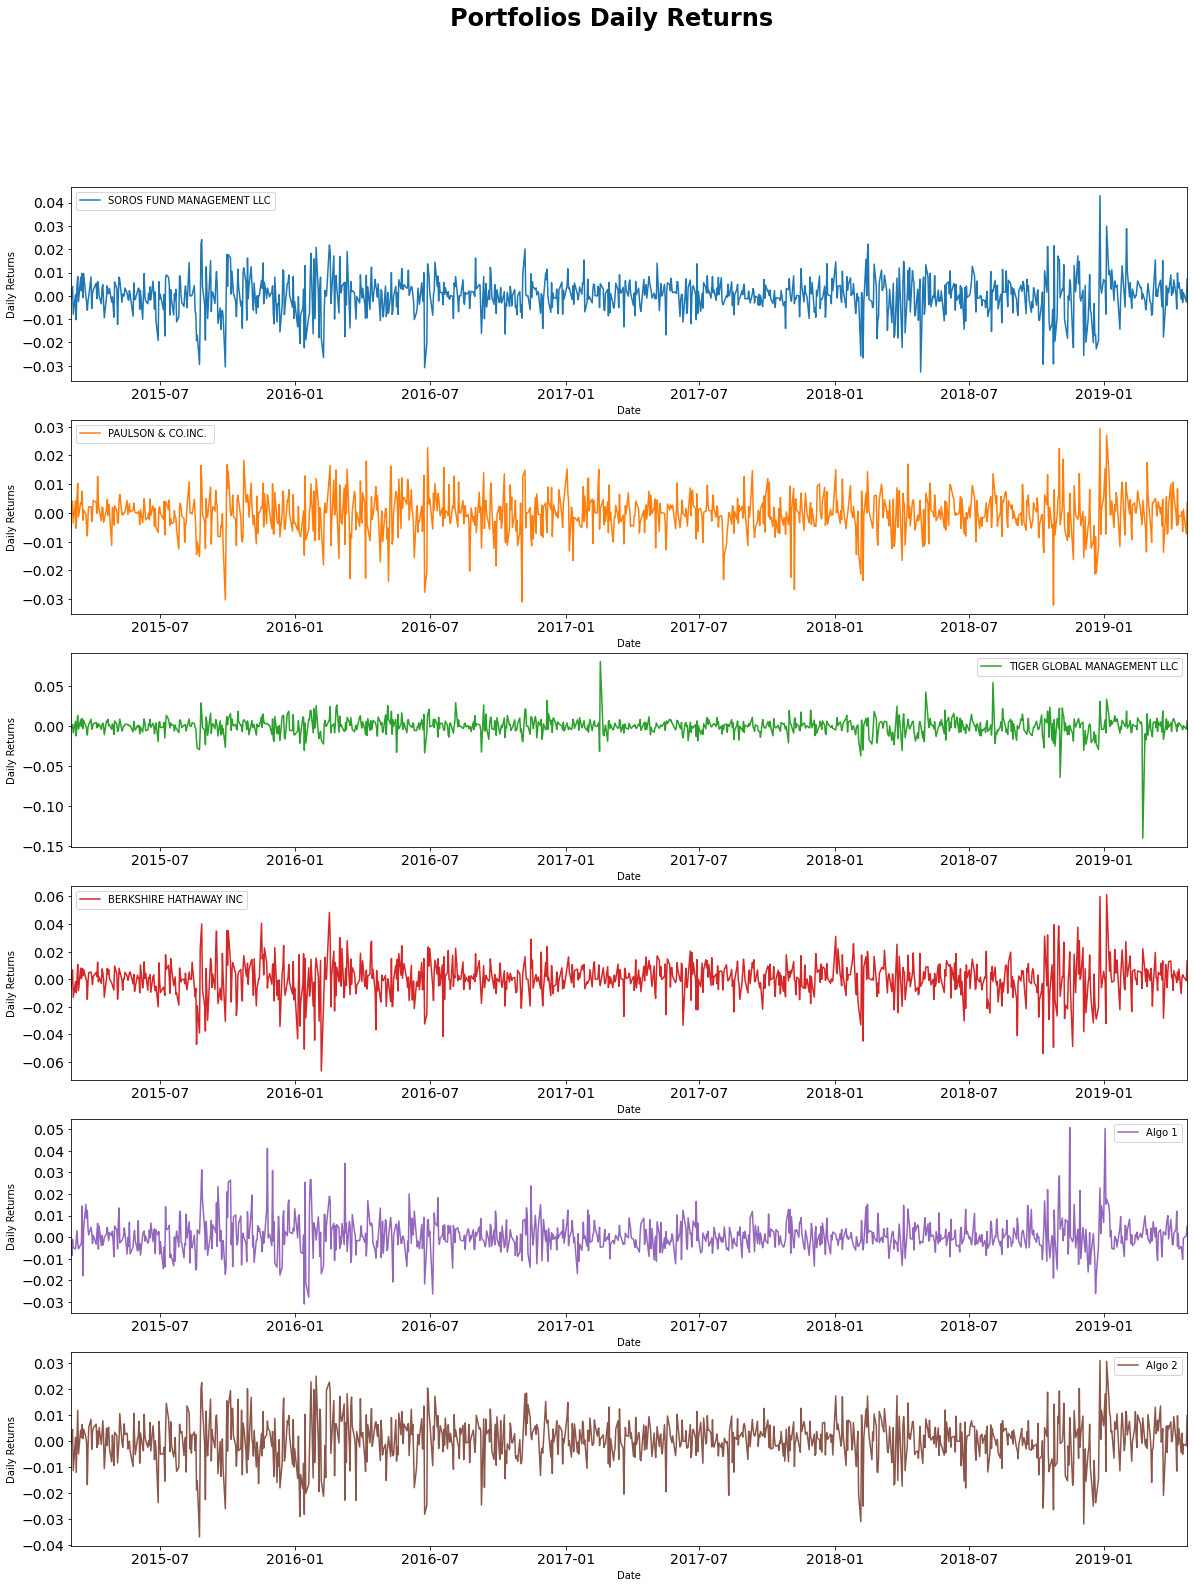

In [20]:
# Plot daily returns of all portfolios
portfolio_df.plot(subplots=True,
                  sharex=False,
                  figsize=(figsize_width,25),
                  fontsize=plot_fontsize,
                  xlabel=date,
                  ylabel=daily_returns,
                  xlim=['2015-03-03', '2019-04-23']);
# Styling Plot using matplotlib.pyplot
plt.suptitle(f'{portfolios} {daily_returns}', fontsize=title_fontsize, fontweight=bold);

#### Calculate and Plot cumulative returns.

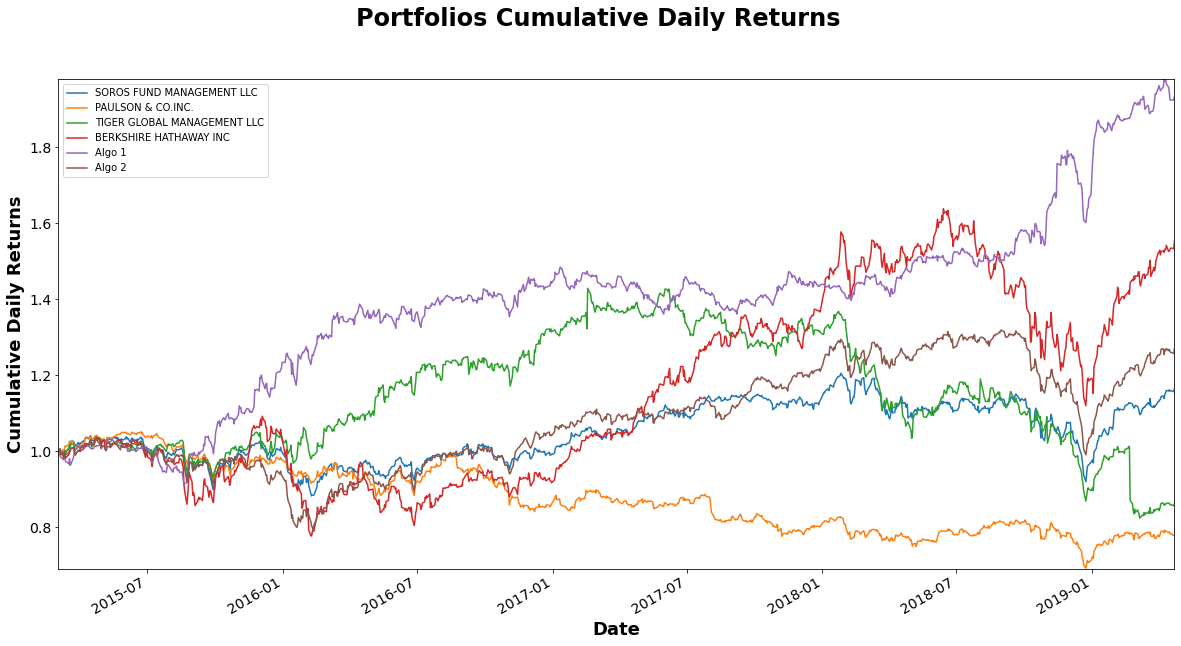

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns_df = (1 + portfolio_df).cumprod()
# Plot title/y axis label
cumulative_daily_returns = f'Cumulative {daily} {returns}'
# Plot cumulative returns
cumulative_returns_df.plot(figsize=(figsize_width,10),
                           fontsize=plot_fontsize,
                           xlim=['2015-03-03', '2019-04-23'],
                           ylim=[0.69,1.98]);
# Styling Plot using matplotlib.pyplot
plt.xlabel(date, fontsize=label_fontsize, fontweight=bold);
plt.ylabel(cumulative_daily_returns, fontsize=label_fontsize, fontweight=bold);
plt.suptitle(f'{portfolios} {cumulative_daily_returns}', fontsize=title_fontsize, fontweight=bold);

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


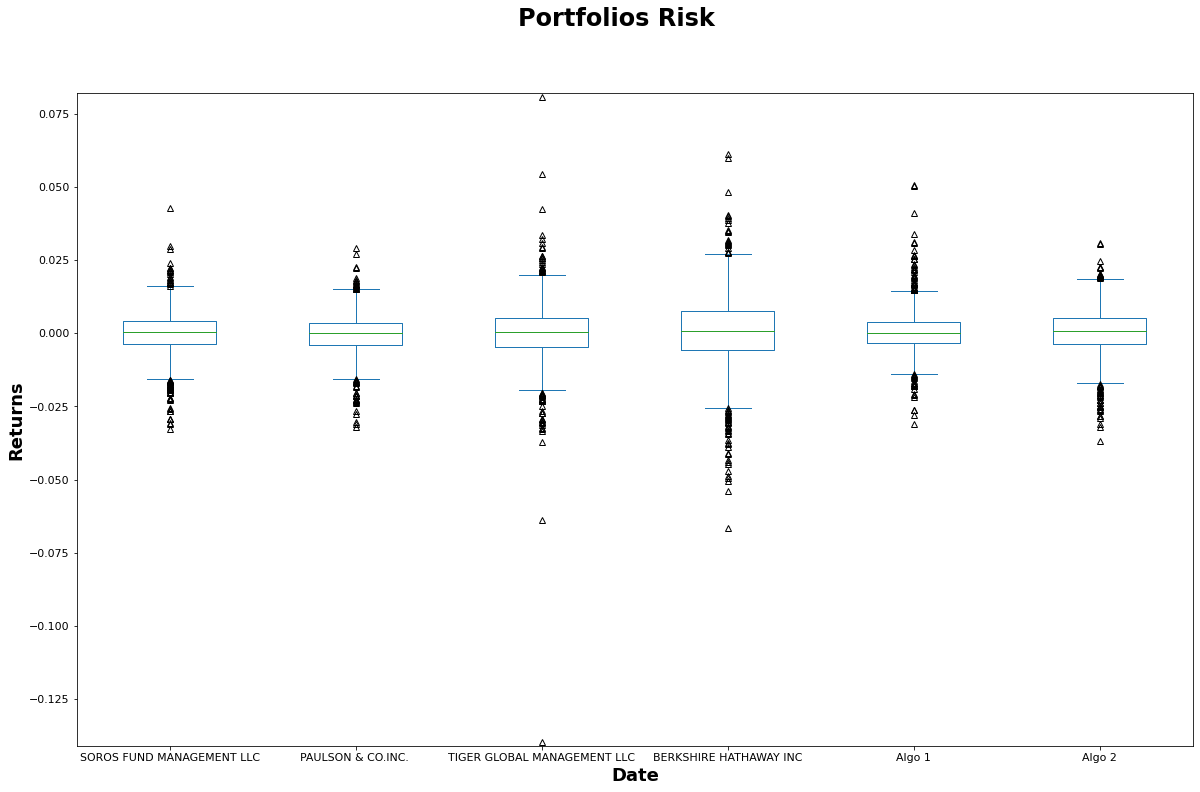

In [22]:
# Box plot to visually show risk
portfolio_df.plot(kind='box', 
                  figsize=(figsize_width,12), 
                  sym='^',
                  fontsize=11,
                  ylim=[-0.141, 0.082]);
# Styling Plot using matplotlib.pyplot
plt.suptitle(f'{portfolios} Risk', fontsize=title_fontsize, fontweight=bold);
plt.xlabel(date, fontsize=label_fontsize, fontweight=bold);
plt.ylabel(returns,fontsize=label_fontsize, fontweight=bold);

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = portfolio_df.std()
# Printing with header
print(f'===Daily {std}===')
portfolio_std

===Daily Standard Deviation===


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [24]:
# Calculate the daily standard deviation of S&P 500
sp500_std = round(returns_df[snp500].std(),6)
print(f'{snp500} {std}: {sp500_std}\n')
# Determine which portfolios are riskier than the S&P 500

#Printing with header
print(f'===Is it Risker than the {snp500}?===')
portfolio_std > sp500_std

S&P 500 Standard Deviation: 0.008554

===Is it Risker than the S&P 500?===


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [25]:
# Utility method to print/return annualized standard deviation with a header     
def get_annualized_std(df):
    # Printing Header    
    print(f'==={annualized} {std}===')
    # Returning Annualized Standard Deviation
    return df.std() * annualized_sqrt

In [26]:
# Calculate the annualized standard deviation (252 trading days)
get_annualized_std(returns_df)

===Annualized Standard Deviation===


SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [27]:
# Utility method to Plot Rolling Standard Devation as Density Plot/Bell Curve 
def plot_standard_deviation(df, xlim, ylim):
    # Plotting Standard Devation as Density Plot
    df.plot(kind='kde',
            figsize=(figsize_width,10),
            xlim=xlim,
            ylim=ylim,
            fontsize=plot_fontsize);
    # Styling Plot using matplotlib.pyplot
    plt.xlabel(std, fontsize=label_fontsize, fontweight=bold);
    plt.ylabel('Density', fontsize=label_fontsize, fontweight=bold);
    plt.suptitle(f'21-Day Rolling {std}', fontsize=title_fontsize, fontweight=bold);

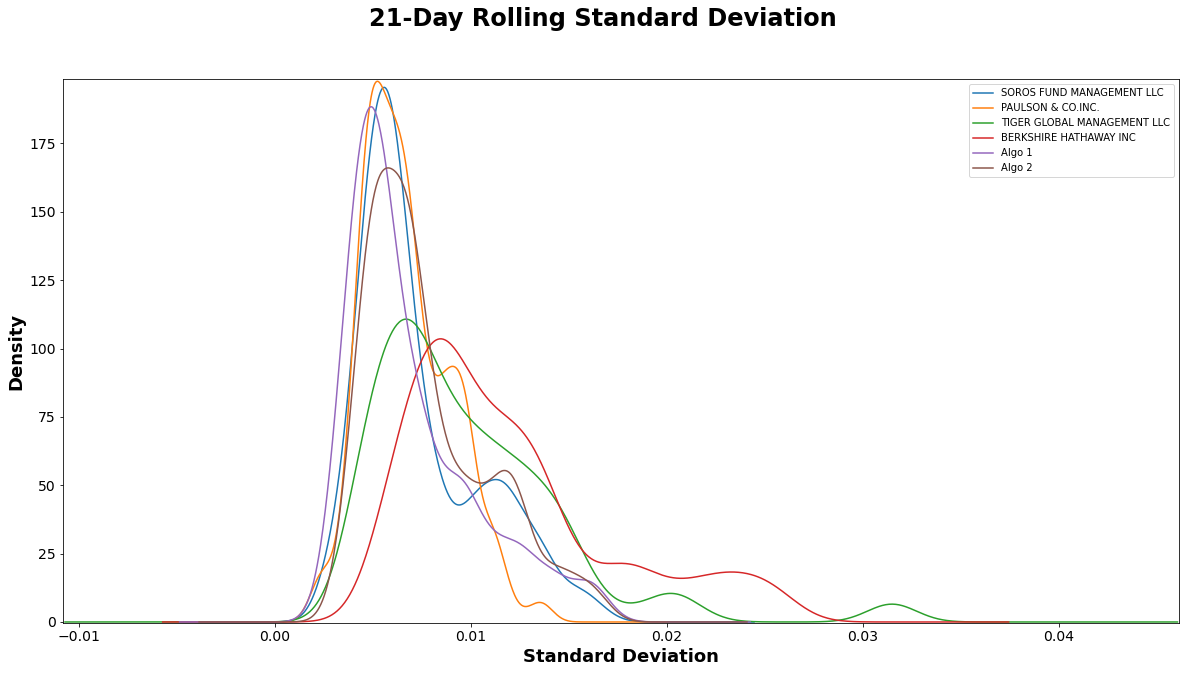

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_portfolio_std = portfolio_df.rolling(window=21).std()
# Plot the rolling standard deviation
plot_standard_deviation(rolling_portfolio_std, [-0.0108, 0.0461], [-0.3,198.5])

### Calculate and plot the correlation

In [29]:
# Calculate the correlation
returns_correlation_df = returns_df.corr()
# Display the correlation matrix
returns_correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [30]:
# Utility method to Calculate and Plot correlation DataFrame        
def calculate_plot_correlation(df, is_correlated_df = False):
    # Calculating and/or assigning Correlation DataFrame
    correlation_df = df if is_correlated_df else df.corr()
    # Styling Plot using matplotlib.pyplot
    plt.figure(figsize=(figsize_width,15))
    plt.suptitle(f'{portfolios_market} {returns} Correlations', fontsize=title_fontsize, fontweight=bold)
    plt.xlabel(portfolios_market, fontsize=label_fontsize, fontweight=bold)
    plt.ylabel(portfolios_market,fontsize=label_fontsize, fontweight=bold)
    # Plotting Correlation DataFrame/Matrix as Seaborn Heatmap
    sns.heatmap(correlation_df,
                cbar_kws={'shrink': .5},
                mask=np.triu(np.ones_like(correlation_df, dtype=bool)),
                vmin=-1,
                vmax=1,
                center=0,
                cmap='gist_heat', 
                linewidth=1,
                square=True).set(xlabel=portfolios_market,
                                 ylabel=portfolios_market);

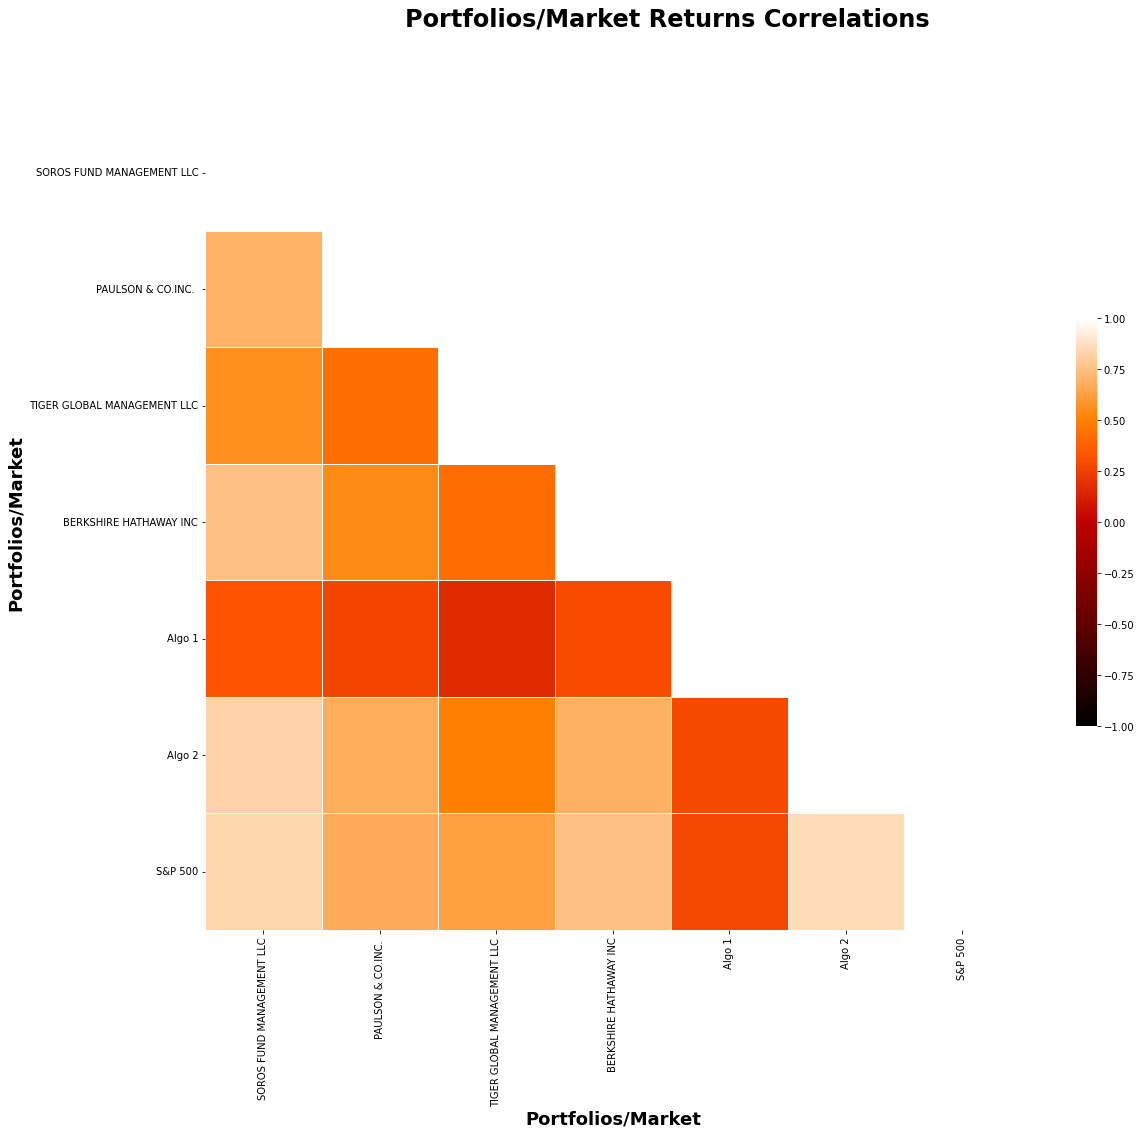

In [31]:
# Plot correlation matriix
calculate_plot_correlation(returns_correlation_df, True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [32]:
# Utility method to plot beta
def plot_beta(df):
    # Plotting Beta DataFrame
    df.plot(figsize=(figsize_width,10), 
            xlim=['2015-05-24', '2019-04-23'],
            ylim=[0.58, 1.88],
            fontsize=plot_fontsize);
    # Styling Plot using matplotlib.pyplot
    plt.suptitle(f'Rolling 60-Day {beta} Trend of BERKSHIRE HATHAWAY INC', fontsize=title_fontsize, fontweight=bold);
    plt.xlabel(date, fontsize=label_fontsize, fontweight=bold);
    plt.ylabel(beta,fontsize=label_fontsize, fontweight=bold);

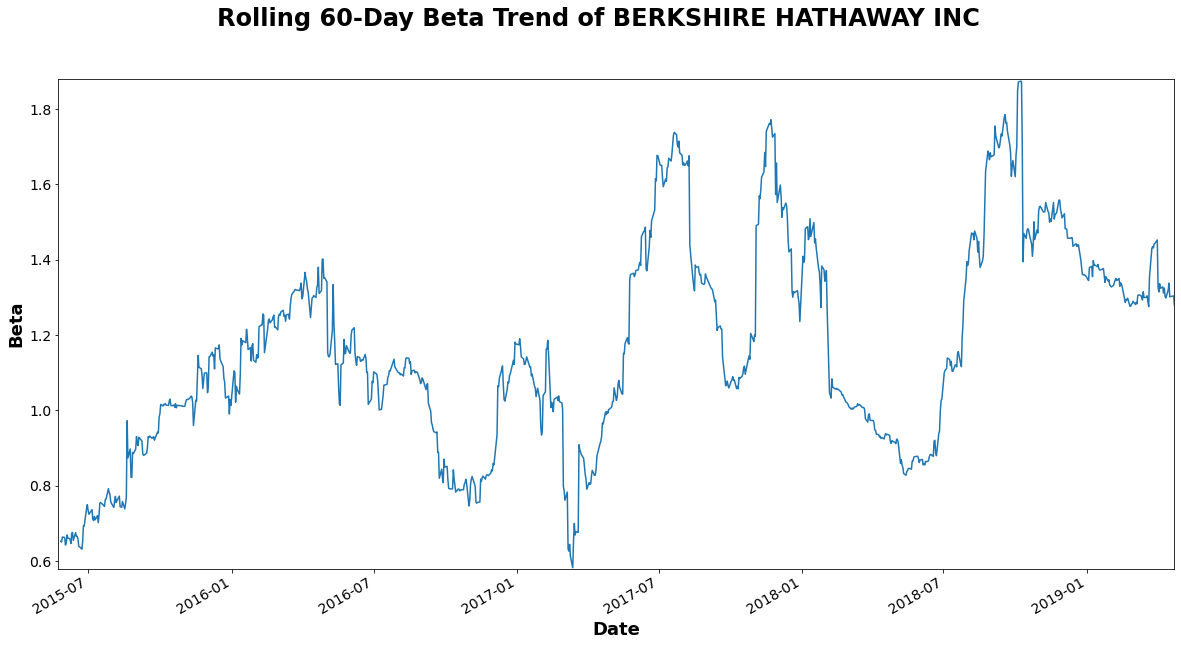

In [33]:
# Calculate covariance of a single portfolio
covariance = returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(returns_df[snp500])
# Calculate variance of S&P 500
variance = returns_df[snp500].rolling(window=60).var()
# Calculating beta
beta_df = covariance / variance
# Plot beta trend
plot_beta(beta_df)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [34]:
# Use `ewm` to calculate the rolling window
portfolio_df.ewm(halflife=21).mean().std()

SOROS FUND MANAGEMENT LLC      0.000876
PAULSON & CO.INC.              0.000799
TIGER GLOBAL MANAGEMENT LLC    0.001304
BERKSHIRE HATHAWAY INC         0.001636
Algo 1                         0.001094
Algo 2                         0.001120
dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Utility method to print/return sharpe ratios with a header
def get_annualized_sharpe_ratios(df):
    # Printing Header
    print(f'==={annualized} {sharpe_ratio}s===')
    # Calculating Sharpe Ratios
    sharpe_ratios = df.mean()/df.std()*annualized_sqrt
    #Printing Sharpe Ratios
    print(sharpe_ratios)
    # Returning Sharpe Ratios
    return sharpe_ratios

In [36]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = get_annualized_sharpe_ratios(returns_df)

===Annualized Sharpe Ratios===
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64


In [37]:
# Utility method to plot sharpe ratios    
def plot_sharpe_ratios(df):
    # Styling Plot using matplotlib.pyplot
    plt.xlabel(portfolios_market,fontsize=label_fontsize, fontweight=bold)
    plt.ylabel(f'{sharpe_ratio} Values',fontsize=label_fontsize, fontweight=bold)
    plt.suptitle(f'{sharpe_ratio}s', fontsize=title_fontsize, fontweight=bold)
    #Plotting Sharpe Ratios as Bar Plot
    df.plot(kind='bar', fontsize=plot_fontsize, figsize=(figsize_width,10));

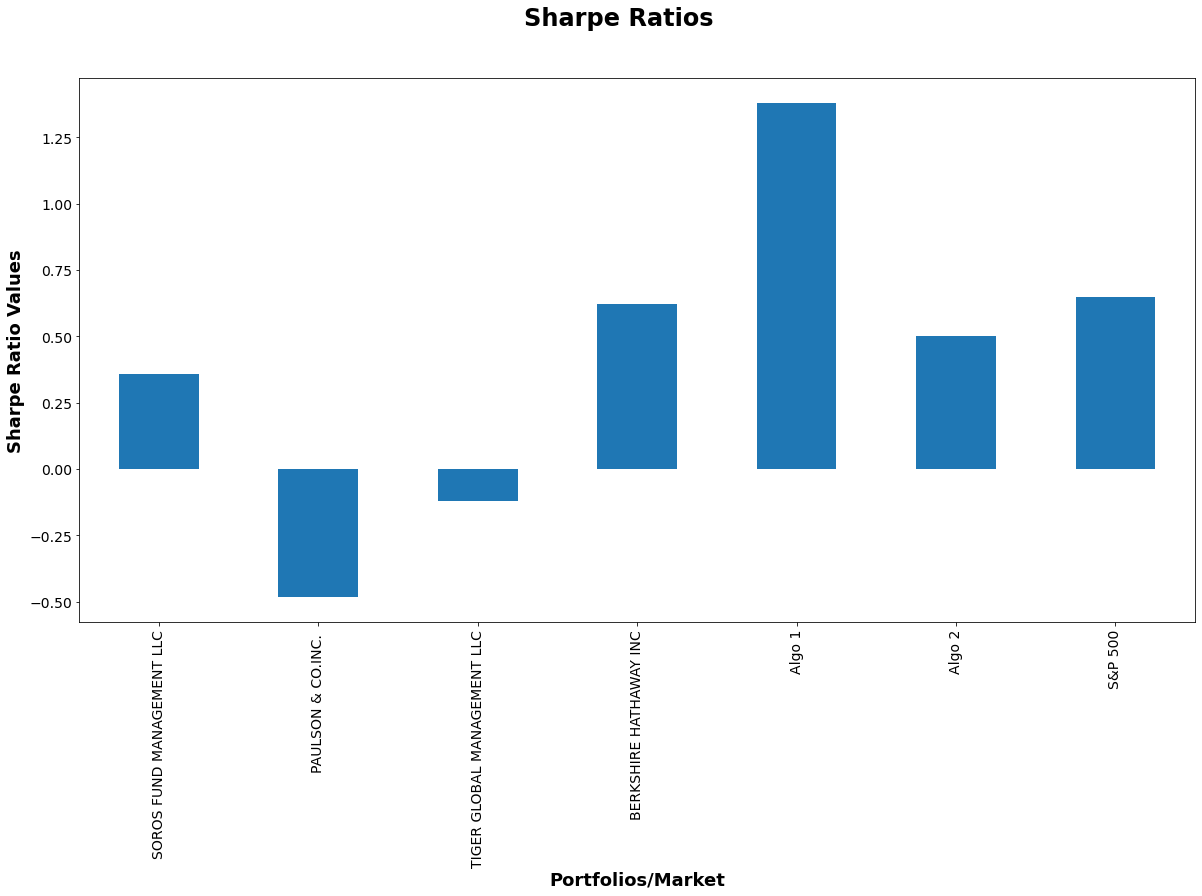

In [38]:
# Visualize the sharpe ratios as a bar plot
plot_sharpe_ratios(annualized_sharpe_ratios)

### Determine whether the algorithmic strategies outperform both the market S&P 500 and the whales portfolios.

Write your answer here!

The Algo 1 strategy does outperform the market (S&P 500) as well as all of the whales (SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC., TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC) as it has a higher sharpe ratio than all of the whales (SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC., TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC) as well as the market (S&P 500). The Algo 2 strategy, on the other hand, underperforms both against the market (S&P 500), as well as the whale BERKSHIRE HATHAWAY INC as it has a lower sharpe ratio than both of them (BERKSHIRE HATHAWAY INC, S&P 500/market), but it does still outperform against the other three whales (SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC. and TIGER GLOBAL MANAGEMENT LLC), with a higher sharpe ratio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [44]:
# Utility method to get historical stock DataFrame
def get_historical_df(file_name):
    # Get transformed historical DataFrame
    df = get_transformed_df(file_name + '_historical', False)
    # Change Close column datatype to float
    df[close] = df[close].astype('float')
    # Return historical DataFrame
    return df

In [45]:
# Reading data from 1st stock
meta_df = get_historical_df('meta')
# Displaying Last 5 Rows
# meta_df.tail()

TypeError: dtype '<class 'pandas.core.frame.DataFrame'>' not understood

In [ ]:
# Reading data from 2nd stock
amd_df = get_historical_df('amd')
# Displaying Last 5 Rows
amd_df.tail()

In [ ]:
# Reading data from 3rd stock
ibm_df = get_historical_df('ibm')
# Displaying Last 5 Rows
ibm_df.tail()

In [ ]:
# Combine all stocks in a single DataFrame
stocks_df = pd.concat([meta_df, amd_df, ibm_df], axis=1, join='inner')
# Displaying Last 5 Rows
stocks_df.tail()

In [ ]:
# Reset Date index
stocks_df.set_index(stocks_df.index)
# Displaying Last 5 Rows
stocks_df.tail()

In [ ]:
# Reorganize portfolio data by having a column per symbol
stocks_df.columns = [meta,amd,ibm]
# Displaying Last 5 Rows
stocks_df.tail()

In [ ]:
# Calculate daily returns
stocks_df = stocks_df.pct_change()
# Drop and print nulls
drop_print_na(stocks_df)
# Display sample data
stocks_df.sample(5)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
weighted_portfolio_returns = stocks_df.dot(weights)
# Display sample data
weighted_portfolio_returns.sample(5)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns_df = pd.concat([returns_df, stocks_df], axis=1, join='inner')
# Printing last 5 rows
portfolio_returns_df.tail()

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
drop_print_na(portfolio_returns_df)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`
get_annualized_std(portfolio_returns_df)

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation
rolling_portfolio_std = portfolio_returns_df.rolling(window=21).std()
# Plot rolling standard deviation
plot_standard_deviation(rolling_portfolio_std, [-0.0108, 0.0948], [-0.3,205])

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
calculate_plot_correlation(portfolio_returns_df)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Utility method to calculate and plot stocks Beta from Dataframe
def calculate_plot_stocks_beta(df):
    # S&P 500 Series 
    snp_column = df[snp500]
    # 60 Day Rolling Window
    sixty_days = 60
    # Calculating Variance
    variance = snp_column.rolling(window=sixty_days).var()
    # Looping over stock ticker symbols
    for ticker in [meta,amd,ibm]:
        # Calculating Covariance between Stock Series and S&P 500 Series
        covariance = df[ticker].rolling(window=sixty_days).cov(snp_column) 
        # Plotting Stock Beta (covariance/variance)
        (covariance/variance).plot(figsize=(figsize_width,10),
                                   xlim=['2018-04-02', '2019-01-09'],
                                   ylim=[-0.5, 3.21],
                                   fontsize=plot_fontsize);
    # Styling Plot using matplotlib.pyplot
    plt.suptitle(f'Rolling 60-Day Beta of {meta}/{amd}/{ibm} ', fontsize=title_fontsize, fontweight=bold);
    plt.xlabel(date, fontsize=label_fontsize, fontweight=bold);
    plt.ylabel(beta,fontsize=label_fontsize, fontweight=bold);
    plt.legend([meta, amd, ibm], prop={'size': 15});    

In [ ]:
# Calculate and plot Beta
calculate_plot_stocks_beta(portfolio_returns_df)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
annualized_sharpe_ratios = get_annualized_sharpe_ratios(portfolio_returns_df)

In [ ]:
# Visualize the sharpe ratios as a bar plot
plot_sharpe_ratios(annualized_sharpe_ratios)

### How does your portfolio do?

Write your answer here!

My Portfolio contains the stocks META, AMD and IBM. Both META and IBM seem to underperform against the market (S&P 500) as they both have a lower sharpe ratio than that of the S&P 500, whereas AMD seems to outperform the S&P 500 with a much higher sharpe ratio. All three of the stocks (META, AMD, IBM) also underperform against the Algo 1 strategy with lower sharpe ratios. In comparison to the Algo 2 strategy both META and AMD seem to outperform the Algo 2 strategy with higher sharpe ratios, but IBM seems to underperform against the Algo 2 strategy with a lower sharpe ratio. Compared to the whales (SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC., TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC), AMD and META outperforms them all with a higher sharpe ratio, but IBM only outperforms TIGER GLOBAL MANAGEMENT LLC with a higher sharpe ratio and a lower sharpe ratio than SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC. and BERKSHIRE HATHAWAY INC.